<font face = "Verdana" size = 3> 
<center> <h1>Final Report  </h1> <br> </center>
<center><h2> PPOL 564-01 </h2> <br></center>
<center><h2> Introduction to Data Science </h2> </center>
 <br>




<font face = "Verdana" size = 3> 

<h3> Introduction </h3> <br> <br>


The aim of the project is to model and predict Green House Gas (GHG) emissions using country-specific socio-political and economic indicators and find the predictors that play a crucial role in predicting values for Carbon Dioxide (CO<sub>2</sub>) emissions. The recently held UNFCC Climate Change conference (COP26)<sup><a href = "#cit_1">[1]</a></sup>at Glasgow and its proposed future objectives were the inspiration behind pursuing the climate change topic for this project. 
The project report is structured as follows; after the introduction and problem statement, in the second section the data sources are introduced and the cleaning and wrangling process is touched upon. It also sheds light on the motivation behind choosing particular predictors. The third section contains the analysis of the wrangled dataset, and the model framework. The final two sections discuss the results obtained and potential future expansion of the current project. 
<br>

<h3>Background</h3>

The world today has advanced in leaps and bounds in solving problems that had afflicted humanity for centuries. Infant mortality rates are dropping, life expectancies and standard of living are rising across the globe and new research and technologies are being developed everyday to make lives a little better than yesterday. Despite these amazing achievements, there are many challenges that still need to be tackled. One of the most daunting challenges that today’s generation faces is the seemingly insurmountable issue of Global Warming and Climate Change. 
Global Warming has increased the average atmosphere temperature at a rapid pace. With the glaciers melting, leading to rising sea levels and the imminent threats of low lying areas being flooded combined with erratic weather patterns, it becomes absolutely imperative that the World comes together to work towards a sustainable future. 
The COP26 has outlined a number of objectives to tackle the issue of Climate Change and ensure that the average atmospheric temperature doesn’t rise above 1.5 Celsius. These objectives include reaching net 0 emissions by 2050, completely shifting away from coal to renewable sources of energy, increasing forest cover and switching to electric or hybrid vehicles. How well the countries perform on these accounts can change the lives of many. 
<br><br>

<h3>Problem Statement</h3>

The project tries to model carbon dioxide emissions using data such as GDP, Population, dependence on coal power plants, energy consumption and assess which factors predict the outcome variable of emissions well. The unit of analysis is country and the data being used is for a particular year(2016). Since the the predictors being considered for the project are not available from a single source, multiple datasets have been used to construct the final table for modeling. 

    

In [1]:
# Data Wrangling, Scraping and Visualizations  
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import random
import sqlite3
import re
import missingno as miss
import ipywidgets as widget 

# Data Management/Investigation
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import country_converter as coco
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.linear_model import ElasticNet as ENet 
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

In [3]:
## Connecting to a new SQLite Database to store all the data as different tables
conn = sqlite3.connect("Final_Project_Database.sqlite")

In [10]:
## Reading in the data from SQL database
Model_data = pd.read_sql_query("SELECT * FROM Model_Data ", con = conn)


<font face = "Verdana" size = 3> 
<h3> Data </h3> 

There are a number of datasets that have been used to create the final data frame used in the model. Only a few variables from each data set were extracted to create the final table. The data sets and their descriptions are listed below : 
    
<ol>
    
<li> <b>Green House Gas Emissions Dataset<sup><a href = "#cit_4">[4]</a></sup></b> : <br> 
This dataset contains historical data from 1990 to 2018 detailing the amount of emissions produced by different countries for different green house gases. The unit of analysis is countries and the different GHGs. The emissions observations only for CO2 gas and year 2016 were used from the table to construct the outcome variable. The country information was also used as that is the unit of analysis in the final constructed data frame. The names of the countries were converted to a single format using the country-code convertor package across all datasets to be able to join all the datasets together. </li><br> 

<li> <b> Protected Areas Dataset <sup><a href = "#cit_3">[3]</a></sup></b> : <br> 
This dataset has information regarding protected areas such as national parks and wildlife sanctuaries around the world. It has information regarding the year the protected area was designated or instituted and the area covered in square kilometers. The unit of analysis is a particular protected area. As this dataset encoded information regarding the country where this sanctuary is present in terms of ISO3 code, there was also a web scrapping process to link country names with their respective ISO3 codes. The predictors used from this dataset include the country and area covered. </li><br> 

<li> <b> Country Area Dataset <sup><a href = "#cit_8">[8]</a></sup></b> : <br> 
This World Bank data set contains the areas of countries in square kilometers. Only the area and the country name variables were used from this dataset. </li> <br> 

<li> <b> Global Power Plant Dataset <sup><a href = "#cit_2">[2]</a></sup></b> : <br> 
This dataset contains information regarding power plants across the globe including those power plants using renewable sources of energy. The unit of analysis is a particular power plant. The total capacities of plants using different sources of energy were the variables of interest in this dataset. </li> <br>  

<li> <b> Population and Population Growth Dataset <sup><a href = "#cit_6">[6]</a></sup> </b>: <br> 
These data sets were also obtained from World Bank’s open data platform. The population and population growth for the year 2016 were used in the final dataset. </li> <br>  


<li> <b> V-Dem institute democracy indices Dataset <sup><a href = "#cit_7">[7]</a></sup></b>: <br> 
This dataset contains the democracy indices that each country scored over few years. Only scores assessing liberal democracies for the year 2016 was used in the final model. </li> <br>  

<li> <b> Energy Consumption Dataset </b> : <br>  
This dataset contains the energy consumption of countries over few years. The energy consumption is measured in TWh. The data for year 2016 was used the data values for different countries was maximum for that particular year. This is the reason why the data for year 2016 was incorporated in analyzing the model.  </li> <br> 

<li> <b> NDC Dataset <sup><a href = "#cit_5">[5]</a></sup></b> : <br> 
The final dataset used in the model contains information on whether countries ratified the Paris agreement. </li> <br>  

</ol>
A lot of these datasets were stored in an SQLite database for ease of access. 

<b> Model Data Set </b> : <br> <br>  

The final data frame was constructed using the eight datasets used above . The unit of analysis in the dataset is country. The predictors and the motivations for including them are explained as follows : <br> 
<ul> 
<li><b>Emissions </b>: The outcome variable that will be predicted by the model. Obtained from the GHG emissions dataset. Is only for CO2 gas and for the year 2016. As part of expanding this model in the future, there are plans to incorporate other GHGs as outcome variables and analyze if different predictors are more significant for predicting the emissions of different gases. </li>
<li><b>Percentage_of_Area </b>: The percentage of area classified as protected area for a particular country. Obtained from Protected Areas dataset and Country area dataset. The total protected area in a country was divided by the total area of the country to generate this variable. This variable only includes data for protected areas instituted before or in 2016. One of the key objectives of COP26 is to increase forest cover and protected areas in countries. So this model was included to see if there is any bearing on predicting carbon dioxide emissions. </li> 
<li><b>GDP_in_dollars </b> : The GDP of countries in US dollars for the year 2016. The higher the GDP, the more likely it is that countries produce more emissions. </li>
<li><b>Population </b>: The population of countries in 2016. More population, more possibility of pollution.</li>
<li> <b>Population_Growth </b>: The population growth of countries in 2016. This variable was added to assess if population growth contributes towards climate change.</li>  
<li> <b>Energy_Consumption </b>: The energy consumption of countries for 2016. Higher the energy consumption, more probable the increased rate of emissions. </li>  
<li> <b>Liberal_Democracy </b>: The liberal democracy indices for countries in 2016.  It is possible that in liberal democracies, environmental activists and Green parties are more influential and can promote environment as a crucial agenda for the government. </li>
<li> <b>Ratified </b>: Dummy variable signifying whether the country ratified the Paris Agreement. If the country ratified Paris agreement, it is possible that they have started taking the necessary steps to meet the agreed stipulations in the pact. </li>
<li> <b>Coal </b>: The total capacity of coal power plants in a country before or in 2016. Higher the dependency of a country on coal power plants to meet its energy needs, higher the possible emissions. </li>
<li> <b>Hydro </b>: The total capacity of hydro power plants in a country before or in 2016. Hydro power plants also tend to produce green house gases(specifically methane) due to the stagnation of water. Hence this variable is added to see if it impacts the outcome variable. </li>
<li><b> Natural_Gas </b>: The total capacity of natural gas power plants in a country before or in 2016. Similar to coal, natural gas plants also produce pollution though less that coal power plants. </li> <br> 
    
</ul>     

The final dataset referred to as Model_Data was also stored in the SQLite database and a sample of it is displayed below. 

    

In [12]:
M = Model_data[['Emissions', 'Liberal_Democracy', 'Population_Growth', 'GDP_in_dollars', 'Population', 'Energy_consumption', 'Ratified', 'Percentage_of_Area', 'Coal', 'Hydro', 'Natural_Gas']]
M.sample(10)

,Emissions,Liberal_Democracy,Population_Growth,GDP_in_dollars,Population,Energy_consumption,Ratified,Percentage_of_Area,Coal,Hydro,Natural_Gas
40,1.767295,0.384,1.507103,3.186268e+11,103663812.0,481.899,Yes,1.182812,7666.3,3400.10,3411.0
149,1.604727,0.822,0.287421,2.406079e+11,5495303.0,327.915,Yes,3.175973,1340.0,2382.32,1924.1
56,1.722165,0.205,1.549294,2.054868e+10,14030338.0,47.500,Yes,17.056508,920.0,750.00,0.0
123,0.840018,0.122,2.602494,8.690486e+09,11668829.0,4.963,Yes,9.975395,0.0,127.60,26.0
175,1.577997,0.448,2.667488,1.378551e+09,619438.0,0.971,Yes,0.604109,NaN,NaN,NaN
32,1.582268,0.104,2.708073,7.429662e+10,103603461.0,80.515,Yes,9.096080,0.0,3812.60,0.0
2,1.421073,0.882,1.256454,5.156547e+11,9923085.0,594.882,Yes,2.140260,80.0,12822.90,1340.0
79,0.781520,0.434,0.775514,2.114324e+09,2075041.0,4.372,Yes,0.228986,0.0,72.00,0.0
160,0.615267,0.581,2.288615,1.172152e+10,455356.0,32.467,Yes,5.142874,NaN,NaN,NaN
60,1.998002,0.770,1.132349,1.527995e+12,36109487.0,3871.303,Yes,6.242029,9772.0,80683.00,19786.4


<font face = "Verdana" size = 3> 
<h3> Analysis </h3> 

There is an interactive data visualization created based on the initial datasets. The visualization is a drop down menu that allows the reader to choose a country of their liking. Upon making the choice, a graph is generated depicting the increase of protected areas in the country over the years. Unfortunately embedding an interactive element in as static HTML page required a backend kernel which exceeds the scope of this project. A reference image is shown below and the project notebook contains the working interactive graph. 

    

<font face = "Verdana" size = 3> 
    
The next step after data wrangling was visualizing the distributions of the predictors in the final dataset (Model_data) to aid in pre-processing. The model data set was split in training and test split and the distributions of the predictors were observed. The distributions of the variables are shown below. 
    


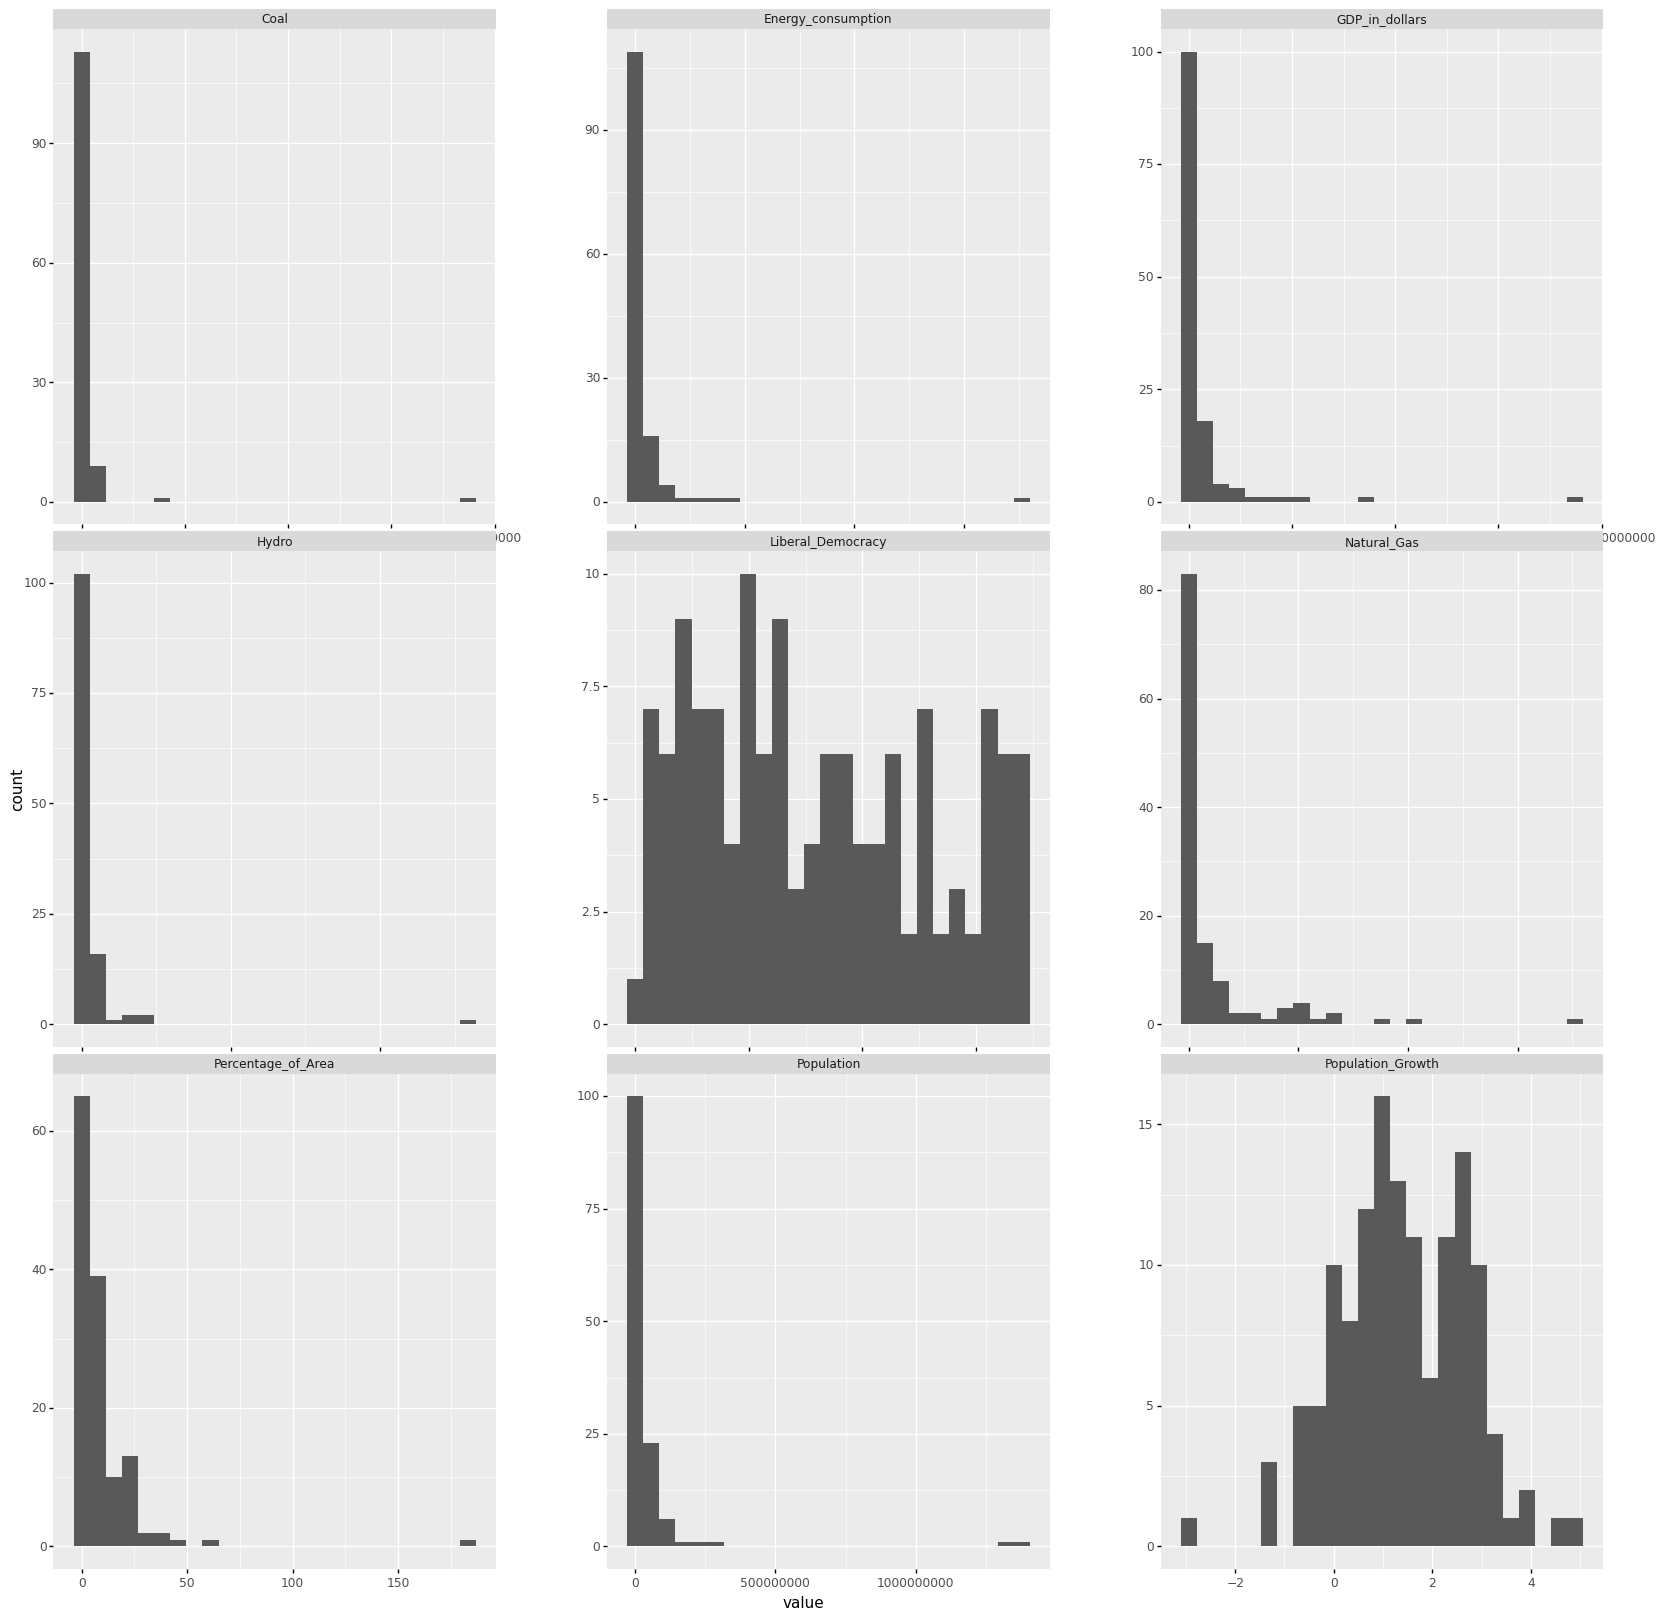

<ggplot: (339245972)>

In [16]:
## Reading in the data from SQL database
Model_data = pd.read_sql_query("SELECT * FROM Model_Data ", con = conn)
y = Model_data['Emissions']
X = Model_data[['Liberal_Democracy', 'Population_Growth', 'GDP_in_dollars', 'Population', 'Energy_consumption', 'Ratified', 'Percentage_of_Area', 'Coal', 'Hydro', 'Natural_Gas']]

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

df = train_X.dropna()
# Plot the continuous Variables 
d = train_X.select_dtypes(include="float").melt()
(ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(20,20),
          subplots_adjust={'wspace':0.25}))

<font face = "Verdana" size = 3>

Those variables that had a skewed distribution were logged to obtain normal distributions. The variables that were logged are Emissions(outcome variable), GDP_in_dollars, Population, Energy_consumption, Percentage_of_Area, Coal, Hydro and Natural_Gas. The Ratified variable was converted to a dummy variable with yes taking the value of 1 and no taking the value of 0. <br>

After dropping null values(visualized through missing no package), the effect of the predictors on the outcome variable were visualized. While logged GDP, logged Energy and logged population depicted clear and positive trends with the outcome variable, the others didn’t seem to predict CO2 emissions. <br> 

After preprocessing the data, it was again split into training and test sets. Finally a correlation map was used to examine the correlations between the predictors. The map is displayed below.<br> 

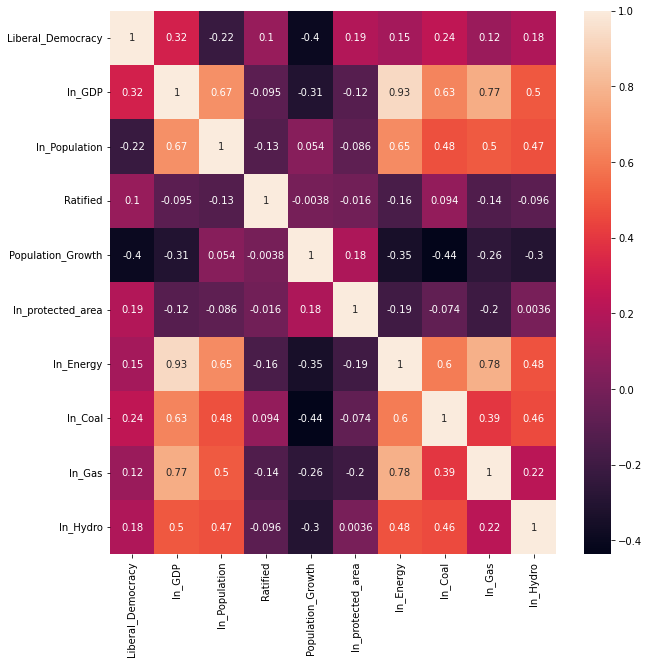

In [17]:
### Logging the required variables 
Model_data['ln_GDP'] = np.log(Model_data['GDP_in_dollars'] + 1)
Model_data['ln_Population'] = np.log(Model_data['Population'] + 1)
Model_data['ln_Energy'] = np.log(Model_data['Energy_consumption'] + 1)
Model_data['ln_protected_area'] = np.log(Model_data['Percentage_of_Area'] + 1)
Model_data['ln_Coal'] = np.log(Model_data['Coal'] + 1)
Model_data['ln_Hydro'] = np.log(Model_data['Hydro'] + 1)
Model_data['ln_Gas'] = np.log(Model_data['Natural_Gas'] + 1)
Model_data['Emissions'] = np.log(Model_data['Emissions'] + 1)

## Converting the ratified variable to a dummy 
Model_data.Ratified = pd.Series(np.where(Model_data.Ratified == 'Yes', 1, 0),
          Model_data.index)

df = Model_data.copy()
df = df.dropna()
y = df['Emissions']
X = df[['Liberal_Democracy','ln_GDP', 'ln_Population', 'Ratified', 'Population_Growth', \
        'ln_protected_area', 'ln_Energy', 'ln_Coal', 'ln_Gas', 'ln_Hydro']]

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1)

## Visualizing the correlation matrix 
train_corr = train_X.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(train_corr, annot = True)

<font face = "Verdana" size = 3>
The energy variable is highly correlated with GDP and less correlated with Population, Coal and Natural Gas variables. The model was run after removing correlated variables, but the error obtained didn’t change so all the variables were retained. <br> 

<b> Running the Model  </b> <br> 

For running machine learning models on the data set, the following steps were carried out. After pre-processing the data, the data was split into training(75%) and test(25%) data set by assigning a random seed. A point to be noted here is that, when the seed was changed (thereby changing the sample values) to observe the variations in the model fit, while the error   after running the model didn’t vary by much, the model producing the best fit itself changed sometimes from a Linear Regressor to a Random Forest.<br>

After splitting the datasets, the model pipeline was designed. As a number of different modeling algorithms were used, the first step was to implement a fold generator to ensure similar samples across all the models. The next step was to bring all the predictors to the same scale in order for the model to work well. For this purpose, a min max scaler was used to scale all the continuous variables. The one categorical variable (Ratified) was already scaled to 0 and 1.<br>  
Then the model pipeline was created to first preprocess the data(applying minmax scaler) and then to fit the data to the model. <br> 
The next step was to define a search space containing the different models to be used in the project. The models used were LinearRegression, K-nearest neighbors, Decisions Trees, Random Forests and Bagging(link them). The hyper parameters associated with each model were tuned and the search space was fed into a grid search cross validation. A grid search performs an exhaustive search over specified parameter values for an estimator.  By specifying the potential values parameters can take on and using cross-validation to compare performance, the parameter that performs the best can be identified.<br> 
The final step is to fit the training data onto the best performing model. Since the outcome variable is continuous, the metric used was negative mean squared error. <br> 
 



In [ ]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Specifying the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['Liberal_Democracy', 'Population_Growth', 'ln_Population', 'ln_protected_area', 'ln_Energy', 'ln_Gas', 'ln_Coal', 'ln_Hydro'])])


# (3) Creating the model pipeline  
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specifying the models and their repsective tuning parameters. 

search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3,4],
     'model__n_estimators':[500,1000,1500],
     'model__max_features' : [1,2,3,4]}
]


# (5) Putting it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fitting the model to the training data
search.fit(train_X,train_y)

<font face = "Verdana" size = 3>
<h3> Results </h3>

After running the model, the final mean squared score was obtained as shown below. 

In [22]:
search.best_score_ ##neg_mean_squared_error

-0.015600426045450116

<font face = "Verdana" size = 3>
The model with the hyperparameters that performed the best was... 

In [23]:
search.best_params_ ## The best performing model 

{'model': RandomForestRegressor(max_depth=4, max_features=2, n_estimators=1500),
 'model__max_depth': 4,
 'model__max_features': 2,
 'model__n_estimators': 1500}

<font face = "Verdana" size = 3>
Running the model on test data generated the mean squared error shown below.

In [24]:
## Mean squred error on test data 
pred_y = search.predict(test_X)
m.mean_squared_error(test_y, pred_y)

0.008877868367748638

<font face = "Verdana" size = 3>
The r_squared score to assess the fit was found to be... 

In [27]:
m.r2_score(test_y, pred_y)

0.5913918007328827

<font face = "Verdana" size = 3>
The predicted and the actual values of the test data were plotted and the graph is shown below. 

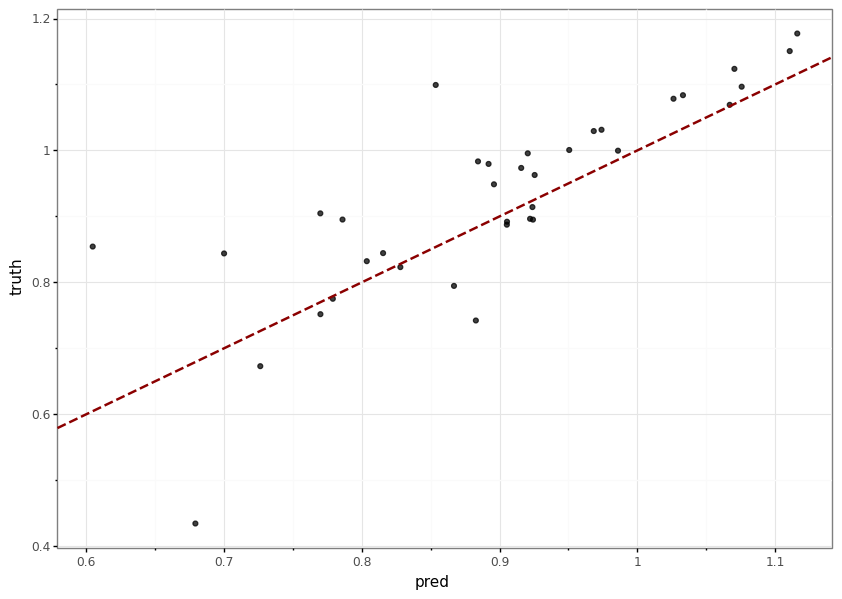

<ggplot: (340067018)>

In [25]:
### Plotting the predicted and actual values from model 
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

<font face = "Verdana" size = 3>
The best performing model was found to be Random Forest Regressor but as this changed upon changing the training and test samples, there was suspicion of the possibility of overfitting due to high variance. But since the model performed relatively well on the test data and the R<sup>2</sup> score wasn't very high, that line of thought was abandoned. 
In order to assess for the importance of variables in the model(given that Random Forest Regressor is a black-box model), permutation importance was estimated and the variables were plotted in order of their importance in predicting the outcome. This graph is shown below. 


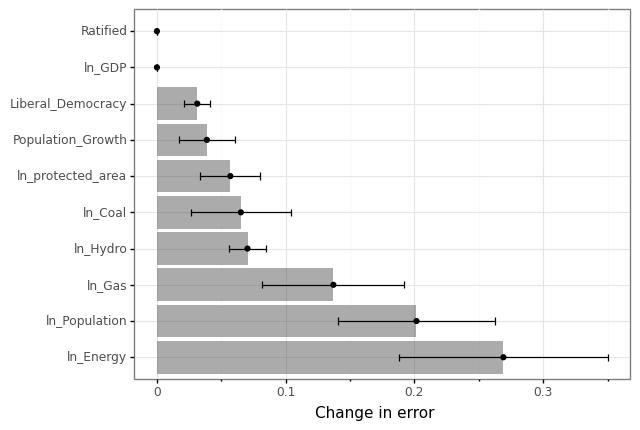

<ggplot: (339888487)>

In [29]:
mod = search.best_estimator_ ## Getting the best model 
## Computing permutation importance 
vi = permutation_importance(mod,train_X,train_y,n_repeats= 25)

# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)

# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Change in error",x="")
)

<font face = "Verdana" size = 3>
The variables population, energy consumption and natural gas contribute the most towards prediction. Surprisingly GDP had no role to play despite displaying a positive trend with respect to the outcome variable. This might be due to the fact that the information encoded by population and energy consumption absorb the effects of the GDP variable. Another interesting observation was the role of Natural Gas and Coal. When the model was run without adding the Natural Gas variable, Coal had higher variable importance(just after Population and Energy Consumption) but upon adding Natural Gas variable, the variable importance for Coal dropped. Hydro and the proportion of protected areas too seems to play a significant role in predicting the outcome. <br> <br> 
The partial dependency plots were also plotted and are shown in the figure given below. 

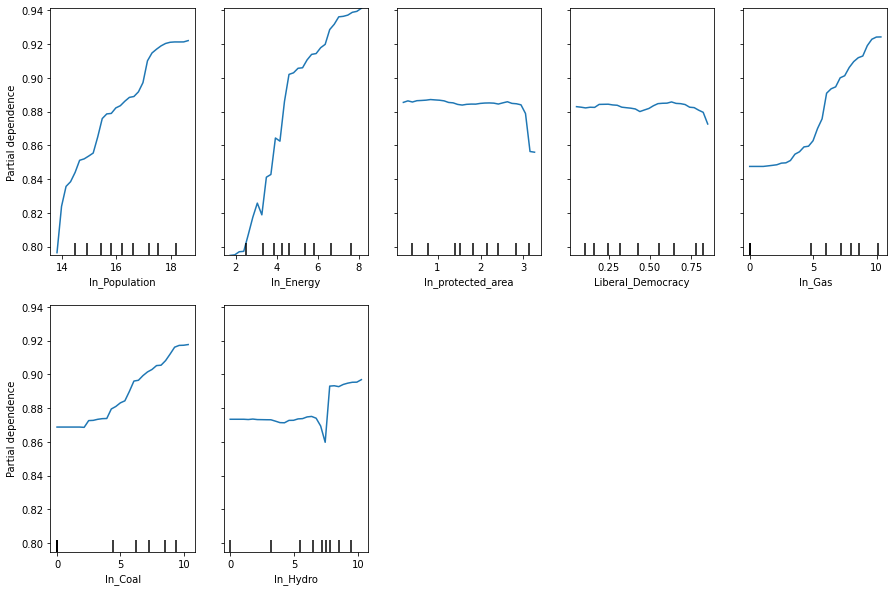

In [30]:
## Plotting Partial Dependency Plots 
# Target specific features
features = ['ln_Population','ln_Energy','ln_protected_area','Liberal_Democracy', 'ln_Gas', 'ln_Coal', 'ln_Hydro']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 10))
display = plot_partial_dependence(
    mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

<font face = "Verdana" size = 3>
The partial dependency plots reflect the relation of the particular variables with the outcome variables. While some indicators such as population and Energy have demostrated strong effects towards predictions other predictors have has less pronounced impacts. 

<font face = "Verdana" size = 3>
<h3> Discussion </h3> <br> <br> 

The original and ambitious idea behind the project was to assess the feasibility of the target to reach net zero emissions by 2050 set by countries during COP26. This project can be considered as an appropriate starting point as it looks into a variety of indicators that can predict GHG emissions. 
There were a number of considerations that had to be scraped off as the project progressed. Working with time series and longitudinal datasets, adding a predictor for country-wise automobile usage, subsetting the data into different sub-groups to monitor the effects on emissions, using different GHGs as outcome variables were some of the ideas that couldn’t be implemented in this project. These ideas are planned to be explored further in the future.<br> <br> 
Working with interactive visualization elements and embedding them into html documents is another challenge that wil be looked into in the future. <br> <br>
‘Success’ of the project can be evaluated in terms of the skills gained in handling and cleaning large datasets, looking at the predictors and judging which would be apt for the purpose of the model, thinking about the dataset and observing trends in it. New tools such as interactive ipywidgets could also be explored in the course of the project.  

<font size = 3 face = "Verdana">
    <h3> Data Citations and References : </h3> <br>
    <a id = "cit_1" href = "https://ukcop26.org/wp-content/uploads/2021/07/COP26-Explained.pdf">  [1] https://ukcop26.org/wp-content/uploads/2021/07/COP26-Explained.pdf </a> <br>
    <a id = "cit_2" href = "https://datasets.wri.org/dataset/globalpowerplantdatabase">  [2] Global Energy Observatory, Google, KTH Royal Institute of Technology in Stockholm, Enipedia, World Resources Institute. 2018. Global Power Plant Database. Published on Resource Watch and Google Earth Engine; http://resourcewatch.org/ https://earthengine.google.com/ </a> <br>
    <a id = "cit_3" href = "https://www.protectedplanet.net/en/search-areas?geo_type=country">  [3] https://www.protectedplanet.net/en/search-areas?geo_type=country </a> <br>
    <a id = "cit_4" href = "https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=cait&historical-emissions-gases=all-ghg&historical-emissions-regions=All%20Selected&historical-emissions-sectors=total-including-lucf&page=1">  [4] https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=cait&historical-emissions-gases=all-ghg&historical-emissions-regions=All%20Selected&historical-emissions-sectors=total-including-lucf&page=1 </a> <br> 
    <a id = "cit_5" href = "https://www.climatewatchdata.org/data-explorer/net-zero-content?page=1">  [5] https://www.climatewatchdata.org/data-explorer/net-zero-content?page=1 </a> <br>
    <a id = "cit_6" href = "https://data.worldbank.org/indicator/SP.POP.GROW?locations=CM%26name_desc=false">  [6] Derived from total population. Population source: ( 1 ) United Nations Population Division. World Population Prospects: 2019 Revision, ( 2 ) Census reports and other statistical publications from national statistical offices, ( 3 ) Eurostat: Demographic Statistics, ( 4 ) United Nations Statistical Division. Population and Vital Statistics Reprot ( various years ), ( 5 ) U.S. Census Bureau: International Database, and ( 6 ) Secretariat of the Pacific Community: Statistics and Demography Programme. License : CC BY-4.0  </a> <br> 
    <a id = "cit_7" href = "https://www.v-dem.net/en/data/data/v-dem-dataset-v111/"> [7]   
    Citation:Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, Nazifa Alizada, David Altman, Michael Bernhard, Agnes Cornell, M. Steven Fish, Lisa Gastaldi, Haakon Gjerløw, Adam Glynn, Allen Hicken, Garry Hindle, Nina Ilchenko, Joshua Krusell, Anna Luhrmann, Seraphine F. Maerz, Kyle L. Marquardt, Kelly McMann, Valeriya Mechkova, Juraj Medzihorsky, Pamela Paxton, Daniel Pemstein, Joseﬁne Pernes, Johannes von Römer, Brigitte Seim, Rachel Sigman, Svend-Erik Skaaning, Jeffrey Staton, Aksel Sundström, Ei-tan Tzelgov, Yi-ting Wang, Tore Wig, Steven Wilson and Daniel Ziblatt. 2021. ”V-Dem [Country–Year/Country–Date] Dataset v11.1” Varieties of Democracy Project. https://doi.org/10.23696/vdemds21
and:
Pemstein, Daniel, Kyle L. Marquardt, Eitan Tzelgov, Yi-ting Wang, Juraj Medzihorsky, Joshua Krusell, Farhad Miri, and Johannes von Römer. 2021. “The V-Dem Measurement Model: Latent Variable Analysis for Cross-National and Cross-Temporal Expert-Coded Data”. V-Dem Working Paper No. 21 , 6th edition. University of Gothenburg: Varieties of Democracy Institute.</a> <br> 
    <a id = "cit_8" href = "https://data.worldbank.org/indicator/AG.LND.TOTL.K2"> [8] World Bank Open Data Platform 